In [26]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
cd /content

/content


In [19]:
rm -rf darknet

In [20]:
!git clone https://github.com/okboseong/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 3493, done.
remote: Counting objects: 100% (3493/3493), done.
remote: Compressing objects: 100% (3080/3080), done.
remote: Total 3493 (delta 408), reused 3467 (delta 382), pack-reused 0
Receiving objects: 100% (3493/3493), 56.20 MiB | 19.90 MiB/s, done.
Resolving deltas: 100% (408/408), done.


In [4]:
!nvcc --version
print("===============================================================================")
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Thu Sep  3 05:17:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+

In [21]:
cd darknet

/content/darknet


In [ ]:
ls -al

In [23]:
!./build.sh

-- Autodetected CUDA architecture(s):  7.0
-- Building with CUDA flags: -gencode;arch=compute_70,code=sm_70
-- Your setup supports half precision (it requires CC >= 7.0)
-- Found OpenMP_C: -fopenmp  
-- Found OpenMP_CXX: -fopenmp  
-- Found OpenMP: TRUE   
--   ->  darknet is fine for now, but uselib_track has been disabled!
--   ->  Please rebuild OpenCV from sources with CUDA support to enable it
-- CMAKE_CUDA_FLAGS: -gencode arch=compute_70,code=sm_70 --compiler-options " -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -Wno-deprecated-declarations -Wno-write-strings -DGPU -DCUDNN -DOPENCV -fPIC -fopenmp -Ofast " 
-- Configuring done
-- Generating done
-- Build files have been written to: /content/darknet/build_release
Scanning dependencies of target darknet
Scanning dependencies of target dark
[  1%] Building C object CMakeFiles/darknet.dir/src/darknet.c.o
[  1%] Building C object CMakeFiles/darknet.dir/src/activation_layer.c.o
[  2%] Building C object CMakeFiles/darkne

In [27]:
cd /content/drive/My\ Drive/YOLO/weight

/content/drive/My Drive/YOLO/weight


In [28]:
ls

darknet53.conv.74         yolov4train_2000.weights   yolov4train_last.weights
yolov3_900.weights        yolov4train_best.weights
yolov4train_1000.weights  yolov4train_final.weights


In [29]:
cp yolov4train_best.weights /content/darknet/build/darknet/x64/backup

In [30]:
cd /content/darknet

/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x 

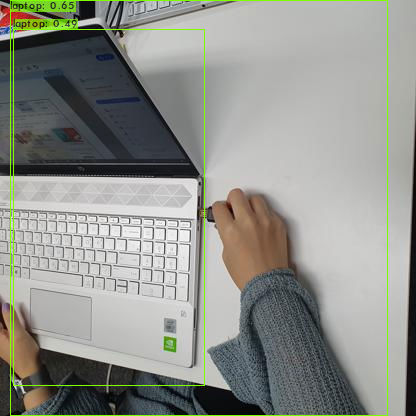

In [33]:
!./darknet detector test build/darknet/x64/data/obj.data build/darknet/x64/cfg/yolov4train.cfg build/darknet/x64/backup/yolov4train_best.weights build/darknet/x64/data/obj/1000.jpg
#!./darknet detector test cfg/obj.data cfg/yolov3.cfg backup/yolov3_900.weights data/img/234.jpg
from IPython.display import Image
Image('predictions.jpg')
